<a href="https://colab.research.google.com/github/josem17-cyber/EDA_PySparkML/blob/main/notebooks/EDA_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=97f68e36d3151bd298cf3458a56d75dae75d75cf953a23e738389f49dcb2c3f0
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


# 1. Descripción del Análisis Exploratorio de Datos (EDA)

# 2. ¿Cuál es la pregunta que vamos a responder?


# 3. Idea General de nuestro DataSet

En primer lugar importaremos las librerías necesarias:

In [2]:
import urllib.request
import pandas as pd
import pyspark.pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


Después tendremos que generar nuestro **DataFrame** ha partri del **CSV**, y ejecutaremos el head() para hacernos una primera idea de la apariencia de nuestros datos.

In [3]:
# Descargar el archivo CSV
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
local_path = "/tmp/insurance.csv"
urllib.request.urlretrieve(url, local_path)

# Cargar el dataset desde el archivo local
df = ps.read_csv(local_path)

# Mostrar las primeras filas del dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nuestro DataFrame cuenta con unas dimensiones de 1337 filas x 7 columnas. Las filas son el número de clientes de un seguro sanitario. Las columnas representasn las variables o características que tenemos de cada pasajero (features).

In [4]:
df.shape

(1338, 7)

Aquí podemos observar cuales son nuestras columnas en una lista:

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

El siguiente método nos permite sacar **información general** de nuestro dataset, esto es muy útil y podemos ver como hay una serie de información que utilizaremos más adelante en el análisis.

In [6]:
df['region'].unique()

0    northwest
1    southeast
2    northeast
3    southwest
Name: region, dtype: object

In [7]:
# Información general del dataset
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int32  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int32  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), object(3)

Pasemos a definir nuestros datos, tanto el **significado**, como la **categorización** o los **tipos de datos**.

# 4. Definiendo los Datos

En este apartado nos encargaremos de definir los datos tanto el significado, como la categorización o los tipos de datos. Esto es realmente útil para tener una idea general del comportamiento de nuestros datos, y además nos servirá para crear distintos tipos de gráficos dependiendo de su categorización.

## 4.1 Descripción de las Variables

En primer lugar veremos el significado de cada variable:
- age: edad del beneficiario principal
- sex: género del contratante del seguro, femenino, masculino
- bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, de los pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente entre 18,5 y 24,9.
- children: número de hijos cubiertos por el seguro de salud / número de dependientes
- smoker: si fuma o no
- region: área de residencia del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.
- charges: costos médicos individuales facturados por el seguro de salud.


## 4.2 Clasificación de Variables

Después veremos la clasificación de estas variables, es decir si son numéricas o categóricas, y dentro de esto si son discretos o continuos, o nominales, binarios u ordinales respectivamente:

- Variables Categóricas
  - Variables Nominales: region
  - Variables Binarias: sex, smoker
- Variables Numéricas
  - Variables Discretas: age, children
  - Variables Continuas: bmi, charges

## 4.3 Tipos de Datos

En este apartado podemos ver los tipos de datos de las variables de cada columna:

In [8]:
df.dtypes

,0
age,int32
sex,object
bmi,float64
children,int32
smoker,object
region,object
charges,float64


- int32(2): age y children
- float64(2): bmi y charges
- object(3): sex, smoker y region

# 5. Datos Faltantes

En primer lugar veremos que columnas tienen valores nulos en nuestro dataset. Como podemos observar no tenemos valores nulos en este dataset.

In [9]:
df.columns[df.isnull().any().to_numpy()]

Index([], dtype='object')

# 6. Comprensión de los Datos

Para este paso crearemos un DataFrame con nuestros datos convertidos a **Pandas**.

In [10]:
df_vist = df.to_pandas()

## 6.1 Variables Categóricas

### 6.1.1 region

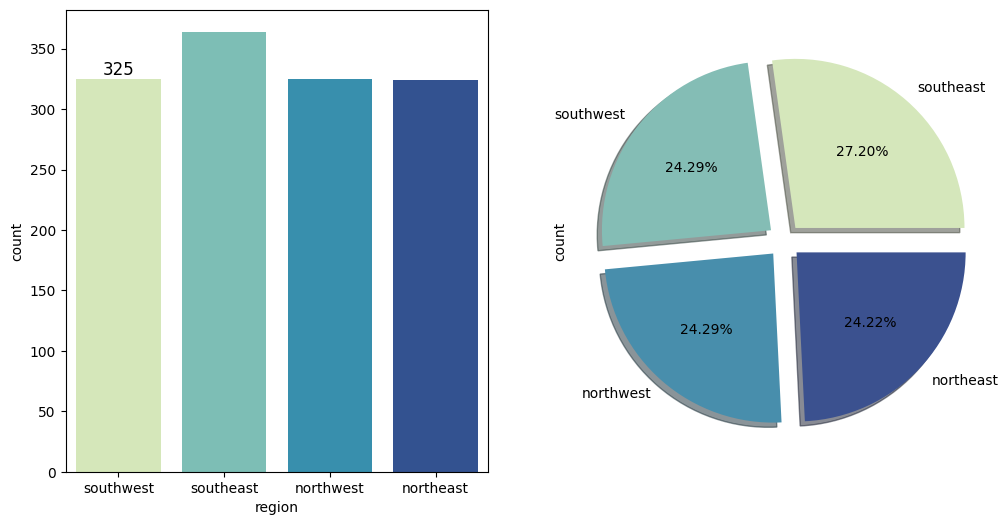

In [11]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'region' del DataFrame
sns.countplot(x='region', data=df_vist, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'region'
df_vist['region'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#D5E7BB", "#84BDB5", "#488EAC", "#3B518F"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.2 sex

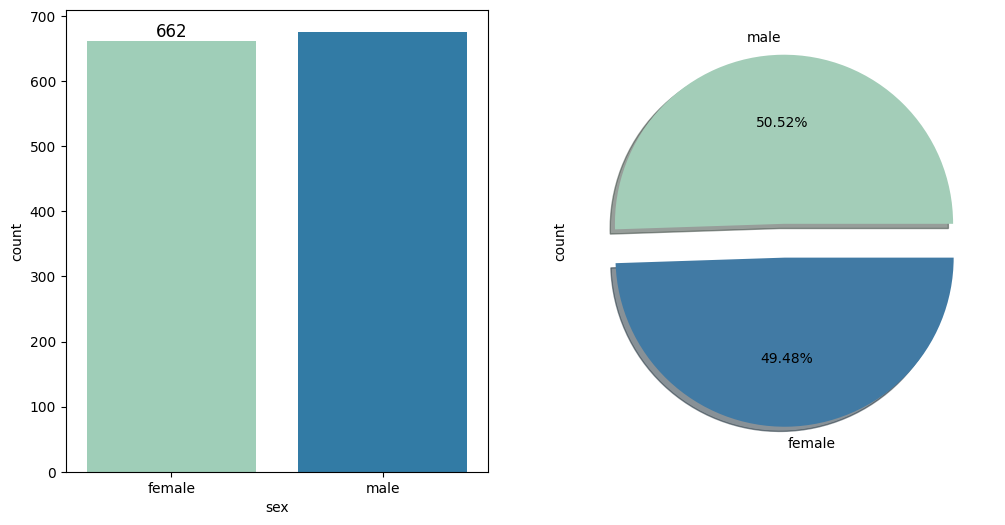

In [12]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'sex' del DataFrame
sns.countplot(x='sex', data=df_vist, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'sex'
df_vist['sex'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#A3CDB8", "#417AA4"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.3 smoker

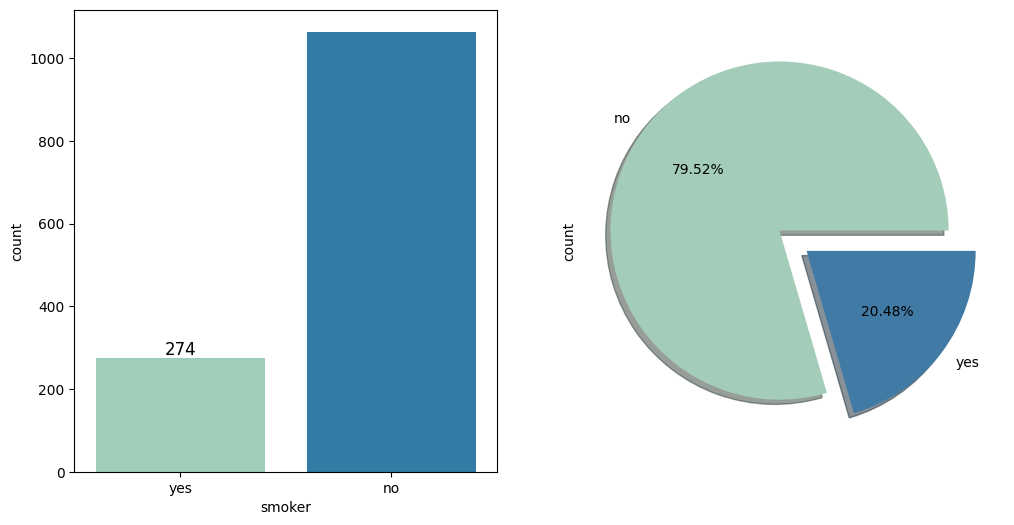

In [21]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'smoker' del DataFrame
sns.countplot(x='smoker', data=df_vist, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'smoker'
df_vist['smoker'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#A3CDB8", "#417AA4"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.4 children

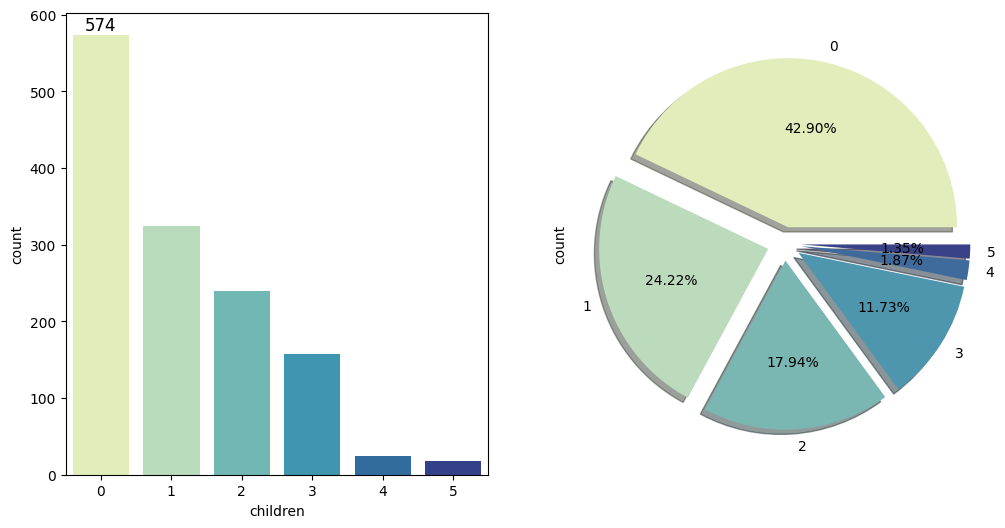

In [22]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'smoker' del DataFrame
sns.countplot(x='children', data=df_vist, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'smoker'
df_vist['children'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#E3EDBB", "#BBDBBC", "#7AB7B3", "#4E95AE", "#3E6B9C", "#394187"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

## 6.2 Variables Numéricas

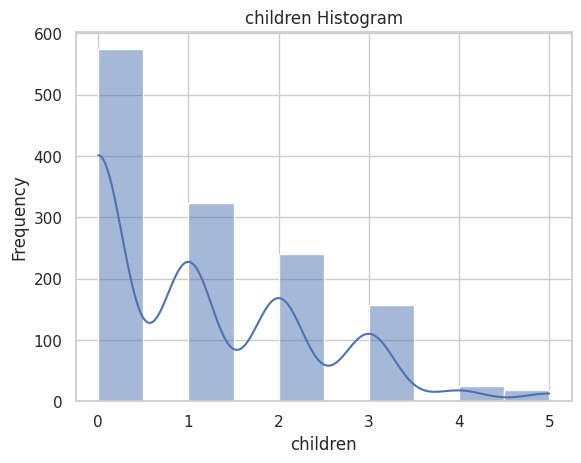

In [36]:
# Crear el histograma de la tarifa ('children')
g2 = sns.histplot(df_vist['children'], kde=True, bins=10)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('children Histogram')

# Mostrar el histograma
plt.show()

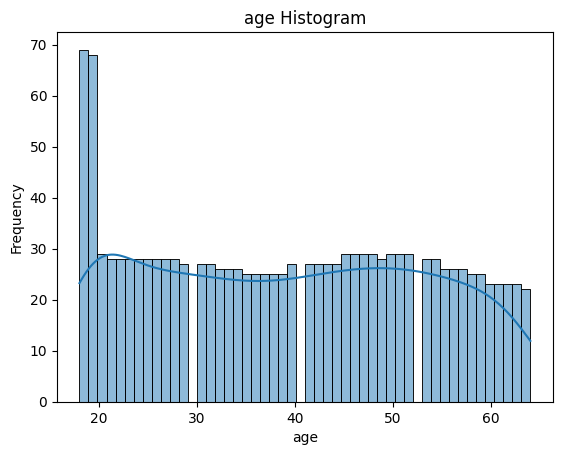

In [24]:
# Crear el histograma de la tarifa ('age')
g2 = sns.histplot(df_vist['age'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('age Histogram')

# Mostrar el histograma
plt.show()

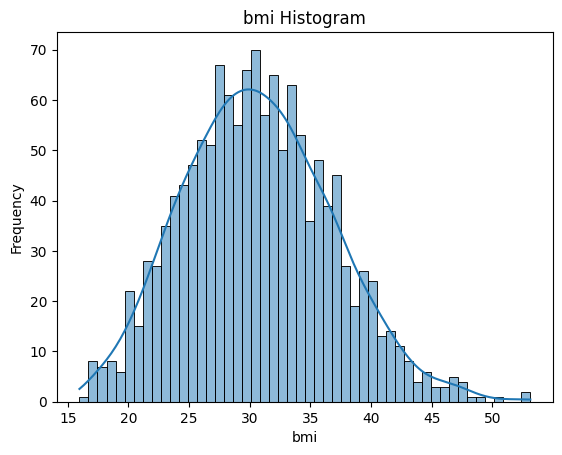

In [25]:
# Crear el histograma de la tarifa ('bmi')
g2 = sns.histplot(df_vist['bmi'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('bmi Histogram')

# Mostrar el histograma
plt.show()

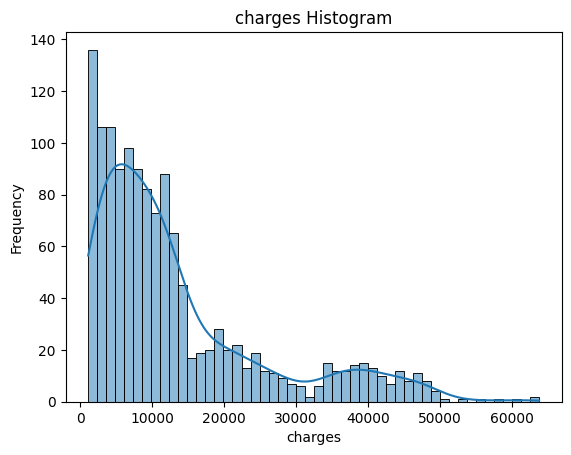

In [26]:
# Crear el histograma de la tarifa ('charges')
g2 = sns.histplot(df_vist['charges'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('charges Histogram')

# Mostrar el histograma
plt.show()

## 6.3 Comparación de cada variable

In [28]:
# Estableciendo estilo de Seaborn
sns.set(style="whitegrid")

### 6.3.1 Gráfico de dispersión (scatterplot) entre BMI y charges

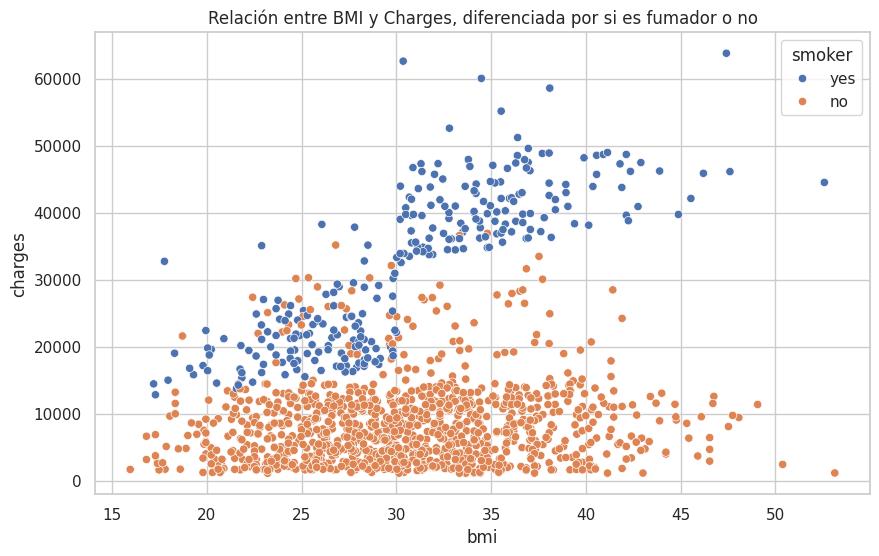

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df_vist, hue='smoker')
plt.title('Relación entre BMI y Charges, diferenciada por si es fumador o no')
plt.show()




- **Patrón observado**: En el gráfico se analiza la relación entre el índice de masa corporal (BMI) y los cargos médicos, diferenciando entre fumadores y no fumadores. Se puede observar claramente que los fumadores tienen cargos médicos considerablemente más altos que los no fumadores, incluso a niveles similares de BMI.

- **Detalles importantes**:
    - **Cargos en no fumadores**: Los puntos naranjas representan a los no fumadores, quienes, independientemente de su BMI, tienden a tener cargos que no suelen superar los 20,000, con poca variabilidad y sin un incremento claro en los cargos a medida que el BMI aumenta.
    - **Cargos en fumadores**: Los puntos azules representan a los fumadores, quienes muestran cargos más altos y una tendencia a mayores costos médicos con el incremento del BMI. En este grupo, es común ver cargos superiores a los 30,000 e incluso algunos casos con costos mayores a los 60,000.
    - **Diferencia entre fumadores y no fumadores**: A un mismo nivel de BMI, los fumadores tienden a tener cargos significativamente mayores que los no fumadores. Esta diferencia se hace más notable a medida que el BMI aumenta.
    - **Distribución y outliers**: Los fumadores presentan una mayor dispersión en los cargos, con algunos outliers muy por encima de los valores promedio. Por otro lado, los no fumadores parecen tener menos variabilidad en sus cargos, con concentraciones en el rango de 0 a 15,000.
  
En resumen, el gráfico muestra que el hábito de fumar está claramente relacionado con un incremento en los cargos médicos, y este efecto se intensifica en personas con un BMI más elevado.

### 6.3.2 Gráfico de caja (boxplot) entre children y charges

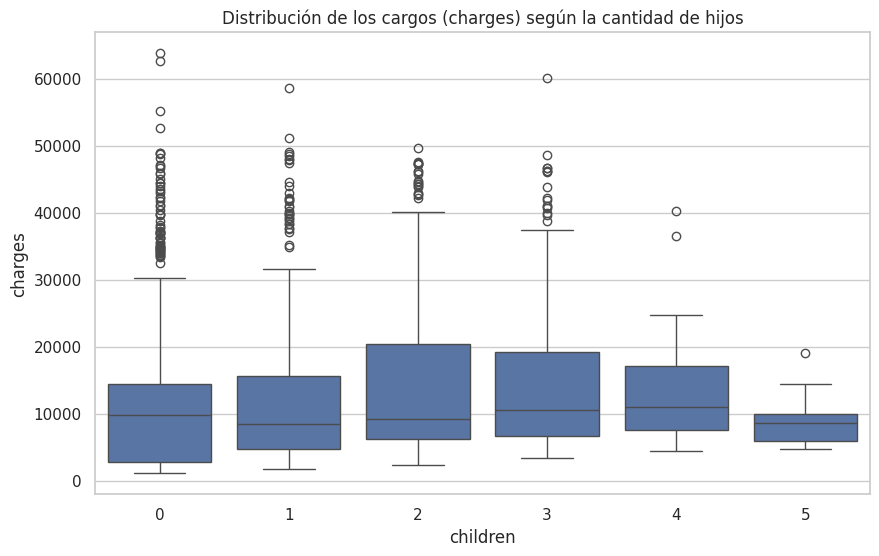

In [32]:
# 2. Gráfico de caja (boxplot) entre children y charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df_vist)
plt.title('Distribución de los cargos (charges) según la cantidad de hijos')
plt.show()


- Patrón observado: En este boxplot se observa cómo varían los cargos en función de la cantidad de hijos.
- Detalles importantes:
  - Aunque la mediana de los cargos parece mantenerse relativamente constante hasta tener 3 hijos, a partir de ahí comienza a disminuir ligeramente.
  - Las personas con más hijos (especialmente 4 y 5) parecen tener menos variabilidad en los cargos y, en promedio, valores ligeramente menores.
  - Las familias sin hijos o con pocos hijos parecen tener más outliers o excepciones donde los cargos son muy elevados (especialmente para quienes no tienen hijos).
  - No se observa un incremento significativo de los costos en relación con el número de hijos, lo que sugiere que tener más hijos no está correlacionado con mayores cargos en este conjunto de datos.

### 6.3.3 Gráfico de violín entre smoker y charges

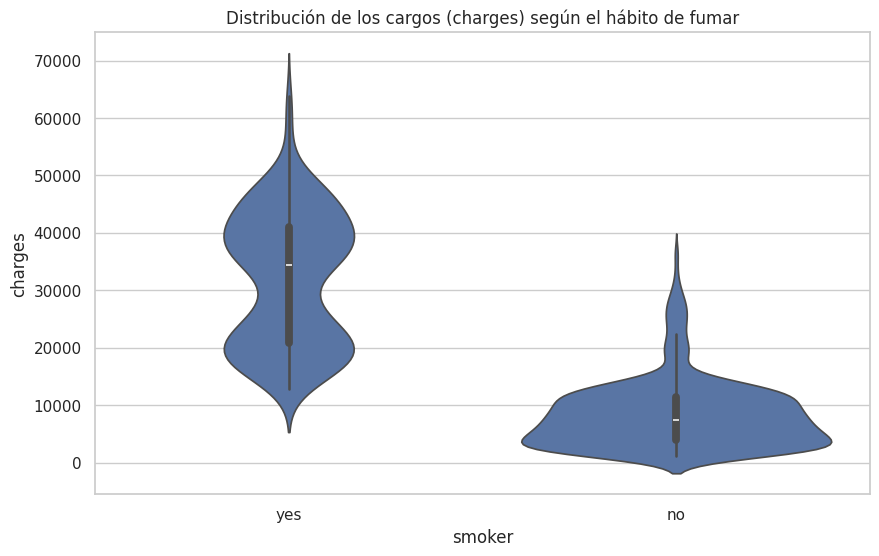

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=df_vist)
plt.title('Distribución de los cargos (charges) según el hábito de fumar')
plt.show()


- Patrón observado: La diferencia entre fumadores y no fumadores es bastante clara en términos de los costos médicos.
- Detalles importantes:
  - Los fumadores presentan un rango mucho mayor en los costos, con algunos alcanzando valores muy elevados (por encima de 60,000), lo que sugiere que los fumadores incurren en costos significativamente más altos.
  - Los no fumadores, en cambio, parecen tener cargos más bajos y distribuidos de manera más uniforme, con una mayor concentración en el rango de 5,000 a 15,000.
  - Esto indica que el hábito de fumar tiene un gran impacto en los costos médicos, lo cual tiene sentido debido a las complicaciones de salud que el tabaquismo conlleva.

### 6.3.4 Gráfico de dispersión (scatterplot) entre age y charges, diferenciada por si es fumador o no

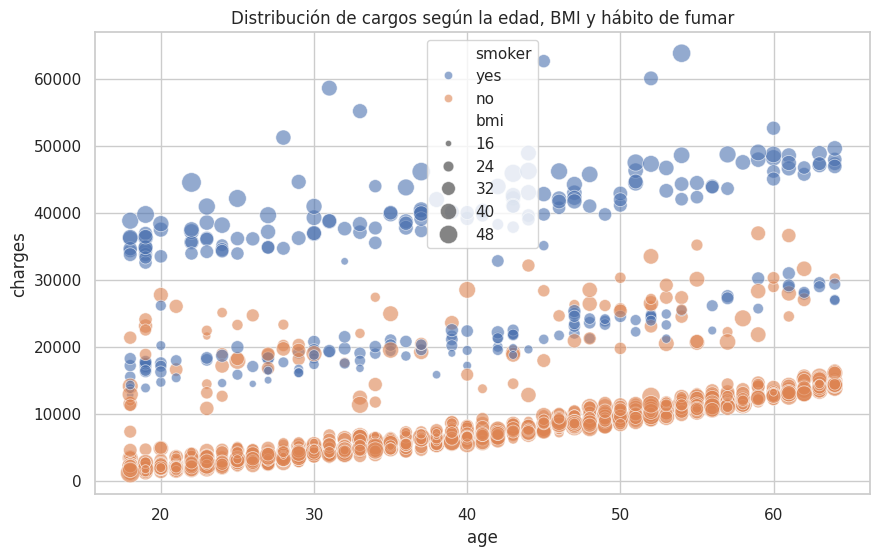

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df_vist, hue='smoker', size='bmi', sizes=(20, 200), alpha=0.6)
plt.title('Distribución de cargos según la edad, BMI y hábito de fumar')
plt.show()

- Patrón observado: En este gráfico de dispersión, se aprecia cómo los costos de los seguros médicos (charges) tienden a aumentar conforme aumenta la edad.
- Detalles importantes:
  - Para los fumadores (si están diferenciados), los costos parecen significativamente mayores en la mayoría de las edades, alcanzando valores más altos que los no fumadores.
  - A partir de los 50 años, se observa un incremento pronunciado de los cargos en general, lo cual es esperable ya que la edad es un factor de riesgo en la salud.
  - Los costos son más dispersos en fumadores, mostrando una mayor variabilidad en los cargos cobrados.

# 7. Feature Engineering

Primero, convertimos el DataFrame de pandas API a un DataFrame estándar de Spark:

In [13]:
from pyspark.sql import SparkSession

# Crear sesión de Spark
spark = SparkSession.builder.appName("InsuranceCharges").getOrCreate()

# Convertir a DataFrame de Spark
spark_df = df.to_spark()


Antes de aplicar un modelo de regresión lineal, debemos convertir las variables categóricas y estandarizar las variables numéricas.

StringIndexer para convertir variables categóricas (`sex`, `smoker`, `region`) a índices numéricos:

In [14]:
from pyspark.ml.feature import StringIndexer

# Convertir las columnas categóricas en índices
indexer_sex = StringIndexer(inputCol='sex', outputCol='sex_index')
indexer_smoker = StringIndexer(inputCol='smoker', outputCol='smoker_index')
indexer_region = StringIndexer(inputCol='region', outputCol='region_index')

# Aplicamos las transformaciones
indexed_df = indexer_sex.fit(spark_df).transform(spark_df)
indexed_df = indexer_smoker.fit(indexed_df).transform(indexed_df)
indexed_df = indexer_region.fit(indexed_df).transform(indexed_df)


**VectorAssembler** para combinar todas las características en un solo vector, incluidas las variables indexadas:

In [15]:
from pyspark.ml.feature import VectorAssembler

# Seleccionar las columnas que serán usadas como features
feature_columns = ['age', 'bmi', 'children', 'sex_index', 'smoker_index', 'region_index']

# Crear el vector de características
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
assembled_df = assembler.transform(indexed_df)


**StandardScaler** para estandarizar las características:

In [16]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaled_df = scaler.fit(assembled_df).transform(assembled_df)


Dividimos los datos en conjuntos de entrenamiento y prueba:

In [18]:
train_df, test_df = scaled_df.randomSplit([0.8, 0.2], seed=42)


# 8. Modelo de Machine Learning

Aplicamos el modelo de regresión lineal de PySpark:


In [19]:
from pyspark.ml.regression import LinearRegression

# Definir el modelo de regresión lineal
lr = LinearRegression(featuresCol='scaled_features', labelCol='charges')

# Entrenar el modelo
lr_model = lr.fit(train_df)

# Predecir en el conjunto de prueba
predictions = lr_model.transform(test_df)


Finalmente, evaluamos el modelo usando métricas como el RMSE (Root Mean Squared Error) y el R^2:

In [20]:
from pyspark.ml.evaluation import RegressionEvaluator

# Calcular RMSE y R2
evaluator_rmse = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")


RMSE: 5675.9062173933235
R2: 0.7944072812622286


# 9. Conclusiones

Este proceso cubre tanto el análisis exploratorio del dataset utilizando la API de Pandas en PySpark como la construcción de un modelo de regresión lineal, que puede predecir los costos médicos (`charges`) en función de las demás variables.